## Predicting House Price: A Simple TensorFlow Regression
This notebook demonstrates a fundamental machine learning project: building a simple regression model with TensorFlow to predict House Price using House Sales in King County, USA. It's a hands-on introduction to a complete ML workflow.

We'll cover:
- Feature Selection: Play around the size of selected features.
- Data Loading and Cleaning: Loading the kaggle dataset and cleaning it for training and  testing.
- Data Visualization: Using Seaborn to plot the relationship.
- Model Building & Training: Constructing and training a basic TensorFlow 2.19.0 sequential model.
- Loss Monitoring: Visualizing training loss over epochs.
- Prediction & Evaluation: Testing the trained model's accuracy.

Required Libraries:
- tensorflow==2.19.0
- numpy==2.2.6
- seaborn==2.1.3
- pandas==2.2.3
- scikit-learn==1.6.1

Let's get started!

# 1. Smaller set of training features

## 1.1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow  as tf
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2. Load Dataset

In [ ]:
# Loading kc_house_data Dataset
df = pd.read_csv("../data/kc_house_data.csv")
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

## 1.3. Visualize Dataset

In [5]:
# Dropping extra columns from the dataset
df = df.drop(labels=["date","id"],axis=1)

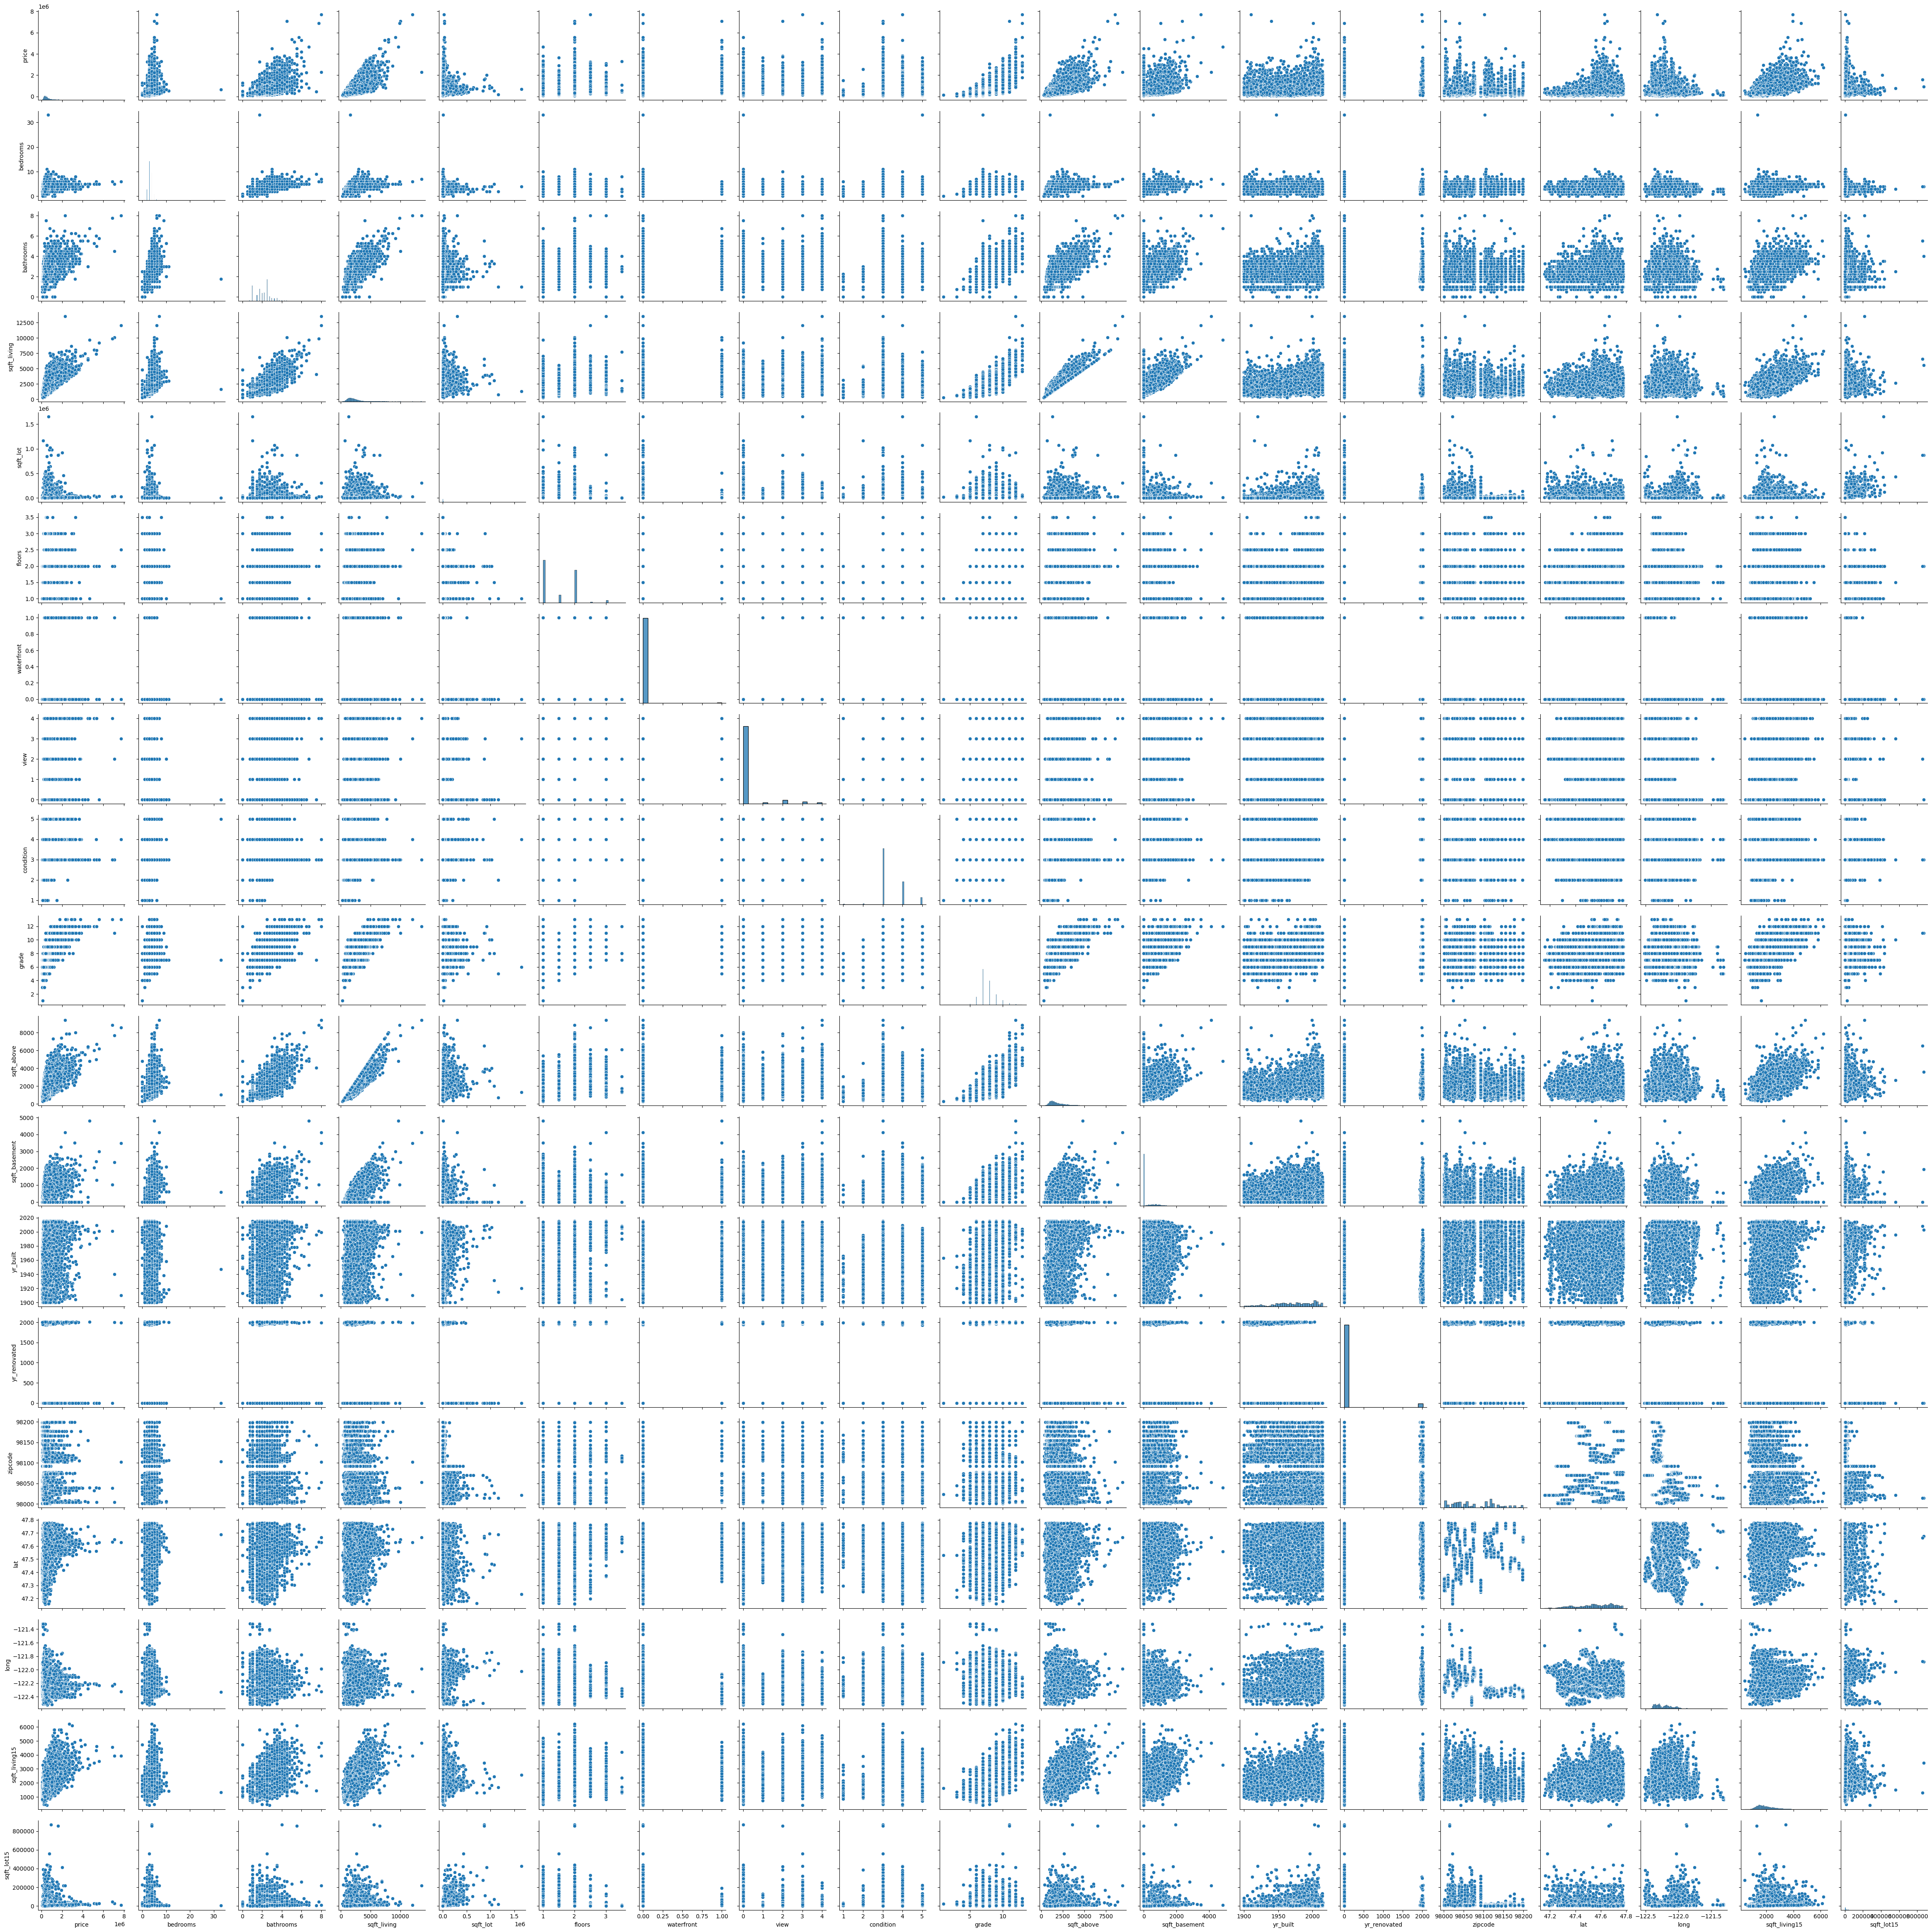

In [6]:
# Investigating  trends among numerical columns
sns.pairplot(df);

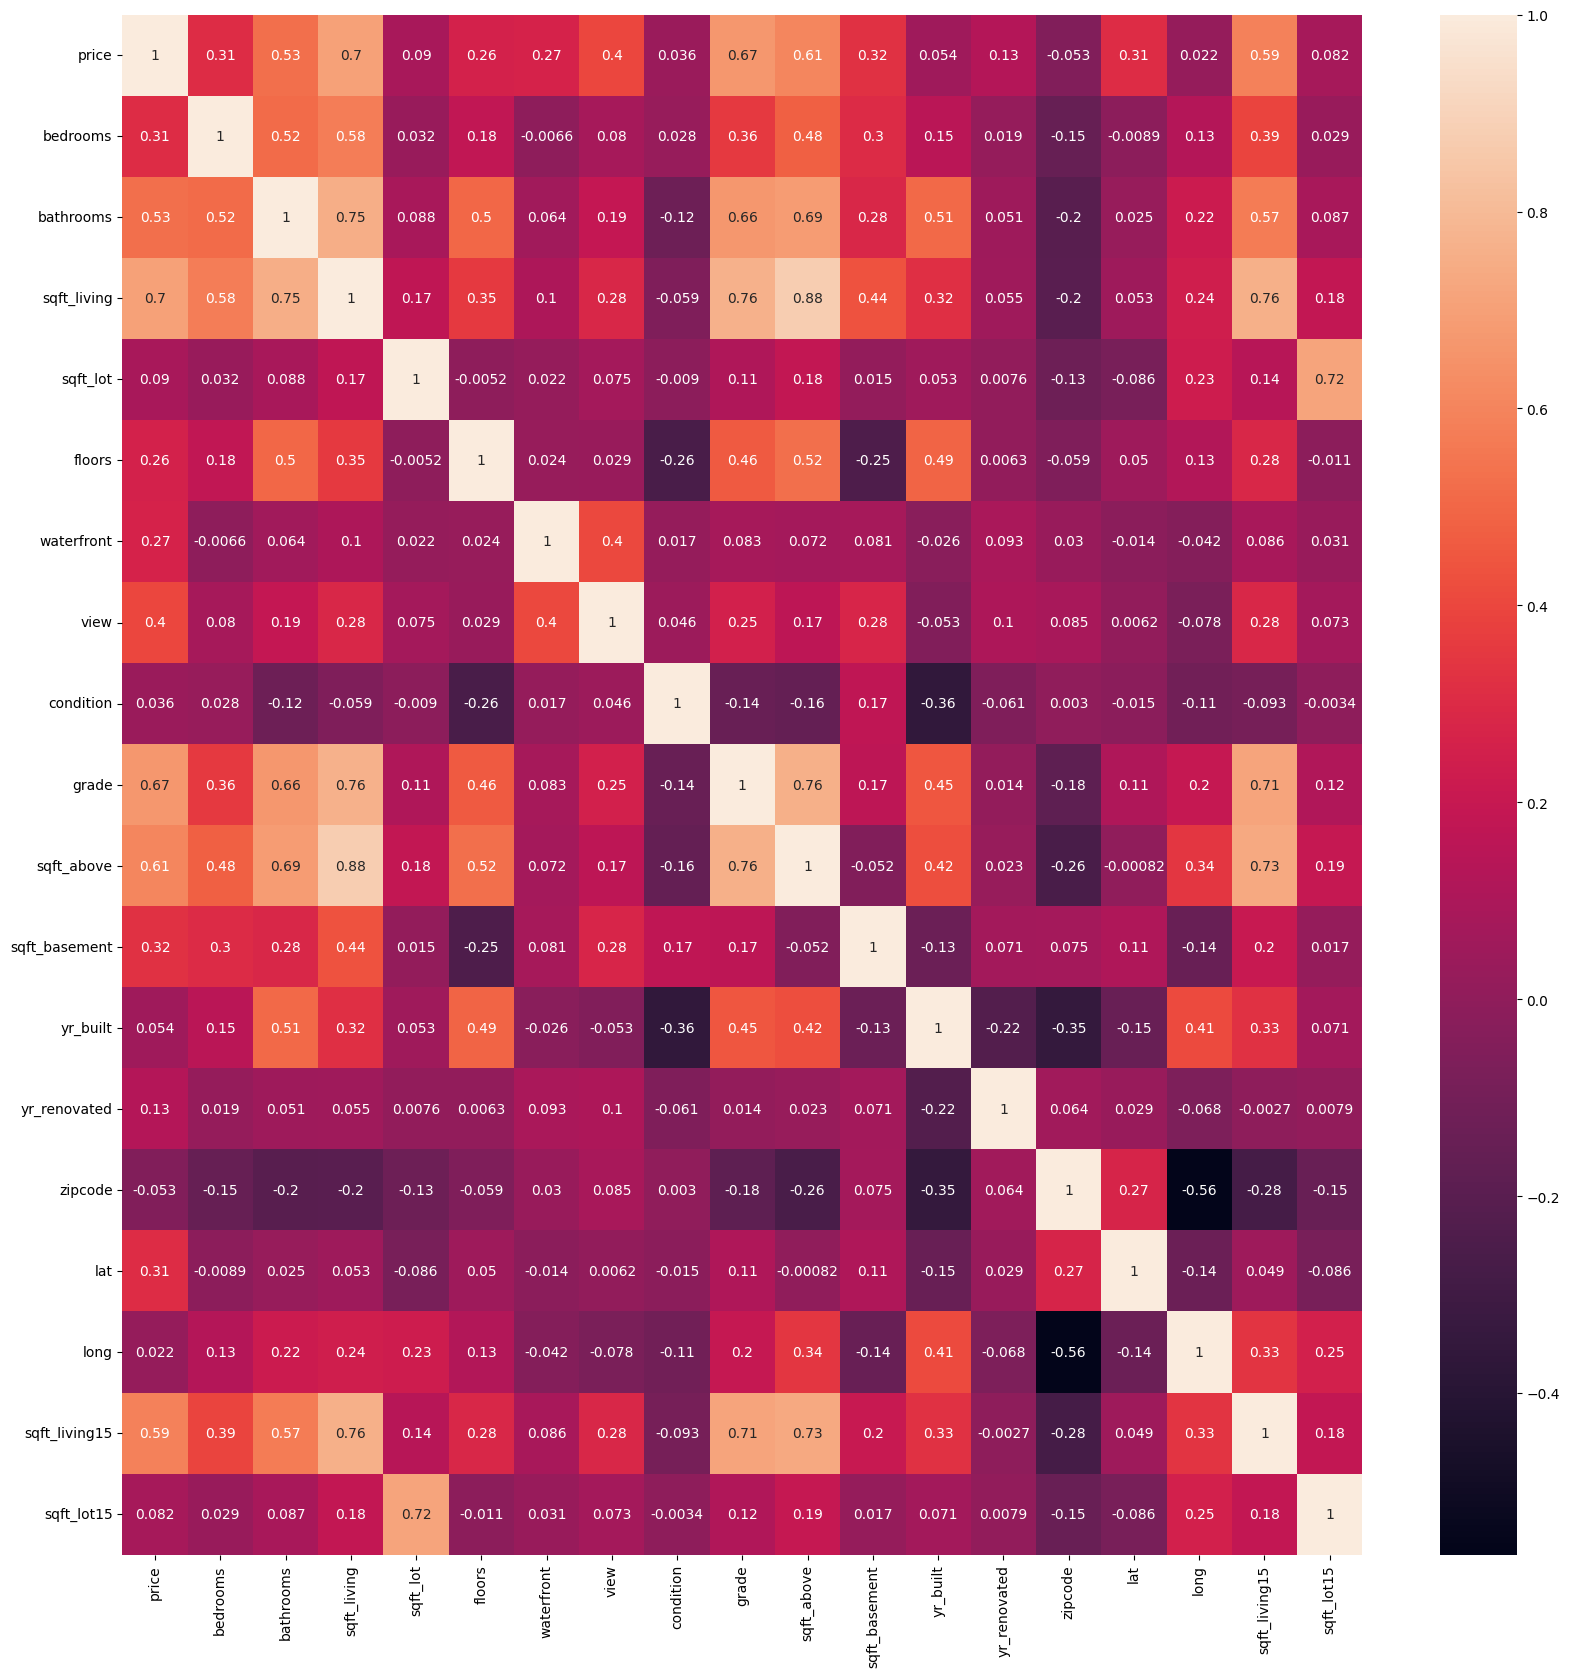

In [7]:
# Investigating  correlation among numerical columns
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True);

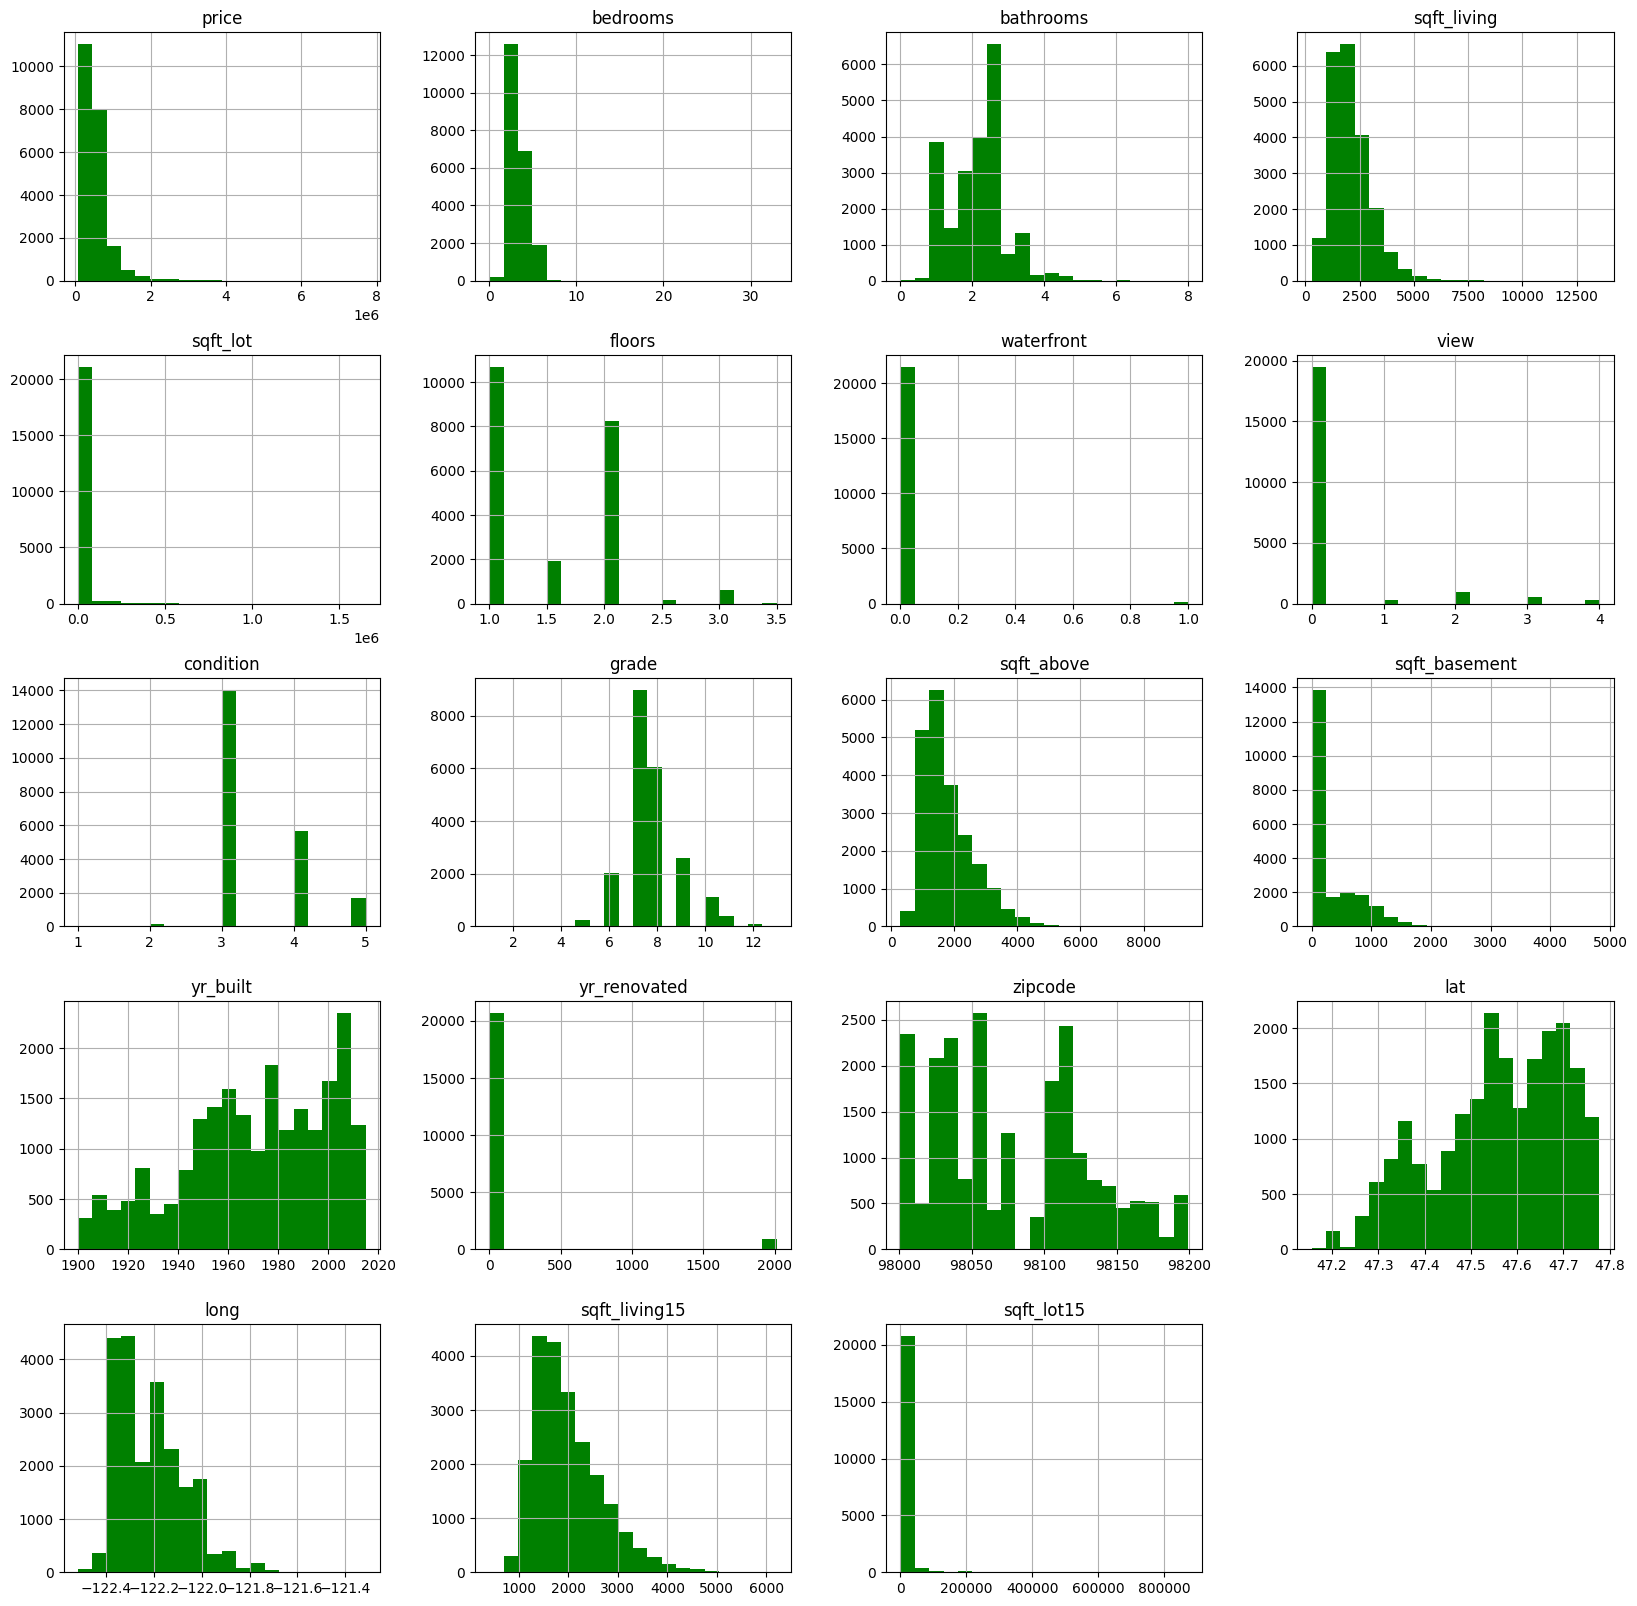

In [8]:
df.hist(bins=20, figsize=(20,20), color ='g');

## 1.4. Create Training and Testing Dataset

Selecting sub_set of the available features

In [9]:
selected_num_cols = ['bedrooms','bathrooms','sqft_living', 'sqft_lot','floors','sqft_above',
       'sqft_basement']

In [10]:
X, y = df[selected_num_cols], df[["price"]]
X.shape, y.shape

((21613, 7), (21613, 1))

Scaling target column to improve model performance

In [11]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y)
print("Warning: Transforming before test_train split can result in data leakage.")

Spliting dataset into train and test set

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17290, 7), (4323, 7), (17290, 1), (4323, 1))

## 1.5.  Build and Train Model

In [29]:
model = tf.keras.models.Sequential();

model.add(tf.keras.layers.Dense(units=100, activation="relu", input_shape=[7]))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))
model.summary();

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 100)            │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,101 (82.43 KB)

 Trainable params: 21,101 (82.43 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='Adam',loss="mean_squared_error")
epochs_hist  = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_split=0.2,verbose=0)

## 1.6. Model Training Summary

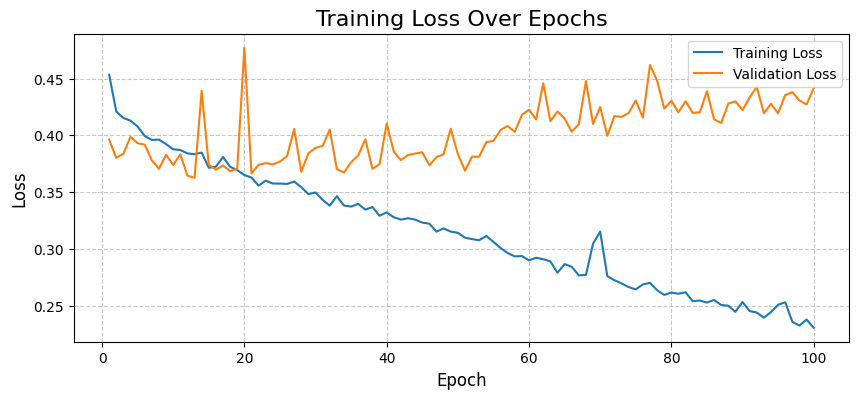

In [15]:
plt.figure(figsize=(10, 4)) 
sns.lineplot(x=range(1, len(epochs_hist.history['loss']) + 1), y=epochs_hist.history['loss'], label='Training Loss')
sns.lineplot(x=range(1, len(epochs_hist.history['val_loss']) + 1), y=epochs_hist.history['val_loss'], label='Validation Loss')
plt.title('Training Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [16]:
# model.get_weights()

## 1.7. Evaluate Model

In [17]:
# Predicting Bike Rental Usage for X_test set
y_pred = model.predict(X_test)

# Rescaling values to original scale
y_pred_rescaled = scaler_y.inverse_transform(y_pred)[:,-1]
y_test_rescaled = scaler_y.inverse_transform(y_test)[:,-1]


136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


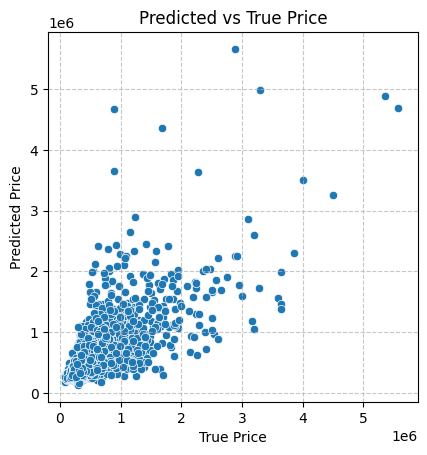

In [18]:
# plt.figure(figsize=(8, 8))
sns.scatterplot(y=y_pred_rescaled,x=y_test_rescaled)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title("Predicted vs True Price")
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.axis('square');

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_pred_rescaled,y_test_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_pred_rescaled,y_test_rescaled)
r2 = r2_score(y_pred_rescaled,y_test_rescaled)

n,k =  X_test.shape[0], X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print(f"--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Adjusted R-squared (ADJ_R2): {adj_r2:.4f}")
print(f"------------------------")

--- Model Evaluation ---
Mean Squared Error (MSE): 78778097542.0058
Root Mean Squared Error (RMSE): 280674.3621
Mean Absolute Error (MAE): 167646.9193
R-squared (R2): 0.3751
Adjusted R-squared (ADJ_R2): 0.3741
------------------------


# 2. Increase the selected features

In [20]:
selected_num_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']

X,y = df[selected_num_cols], df[['price']]
X.shape, y.shape

((21613, 18), (21613, 1))

In [21]:
scaler_x = StandardScaler()
scaler_x = StandardScaler()

X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y)
X.shape, y.shape

((21613, 18), (21613, 1))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17290, 18), (4323, 18), (17290, 1), (4323, 1))

In [31]:
model = tf.keras.models.Sequential();

model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(18,)));
model.add(tf.keras.layers.Dense(units=100, activation='relu'));
model.add(tf.keras.layers.Dense(units=100, activation='relu'));
model.add(tf.keras.layers.Dense(units=1, activation='linear'));

model.summary();

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 100)            │         1,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,201 (86.72 KB)

 Trainable params: 22,201 (86.72 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam', loss="mean_squared_error")
epochs_hist  = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_split=0.2,verbose=0)

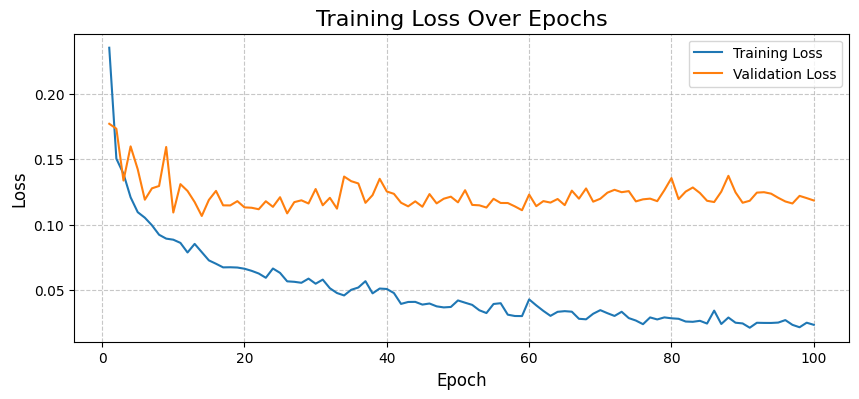

In [25]:
plt.figure(figsize=(10, 4)) 
sns.lineplot(x=range(1, len(epochs_hist.history['loss']) + 1), y=epochs_hist.history['loss'], label='Training Loss')
sns.lineplot(x=range(1, len(epochs_hist.history['val_loss']) + 1), y=epochs_hist.history['val_loss'], label='Validation Loss')
plt.title('Training Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

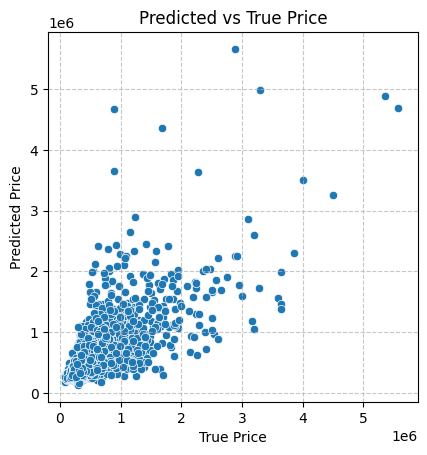

In [26]:
# plt.figure(figsize=(8, 8))
sns.scatterplot(y=y_pred_rescaled,x=y_test_rescaled)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title("Predicted vs True Price")
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.axis('square');

In [27]:

mse = mean_squared_error(y_pred_rescaled,y_test_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_pred_rescaled,y_test_rescaled)
r2 = r2_score(y_pred_rescaled,y_test_rescaled)

n,k =  X_test.shape[0], X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print(f"--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Adjusted R-squared (ADJ_R2): {adj_r2:.4f}")
print(f"------------------------")

--- Model Evaluation ---
Mean Squared Error (MSE): 78778097542.0058
Root Mean Squared Error (RMSE): 280674.3621
Mean Absolute Error (MAE): 167646.9193
R-squared (R2): 0.3751
Adjusted R-squared (ADJ_R2): 0.3725
------------------------
